# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

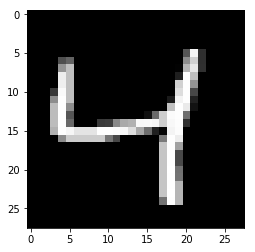

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Get image size
image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ =  tf.placeholder(tf.float32, (None,image_size), "inputs")
targets_ = tf.placeholder(tf.float32, (None,image_size), "targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6940
Epoch: 1/20... Training loss: 0.6897
Epoch: 1/20... Training loss: 0.6852
Epoch: 1/20... Training loss: 0.6803
Epoch: 1/20... Training loss: 0.6756
Epoch: 1/20... Training loss: 0.6688
Epoch: 1/20... Training loss: 0.6614
Epoch: 1/20... Training loss: 0.6526
Epoch: 1/20... Training loss: 0.6429
Epoch: 1/20... Training loss: 0.6332
Epoch: 1/20... Training loss: 0.6181
Epoch: 1/20... Training loss: 0.6042
Epoch: 1/20... Training loss: 0.5905
Epoch: 1/20... Training loss: 0.5734
Epoch: 1/20... Training loss: 0.5580
Epoch: 1/20... Training loss: 0.5417
Epoch: 1/20... Training loss: 0.5214
Epoch: 1/20... Training loss: 0.5047
Epoch: 1/20... Training loss: 0.4906
Epoch: 1/20... Training loss: 0.4683
Epoch: 1/20... Training loss: 0.4532
Epoch: 1/20... Training loss: 0.4409
Epoch: 1/20... Training loss: 0.4193
Epoch: 1/20... Training loss: 0.4082
Epoch: 1/20... Training loss: 0.3997
Epoch: 1/20... Training loss: 0.3862
Epoch: 1/20... Training loss: 0.3703
E

Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1791
Epoch: 1/20... Training loss: 0.1789
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1786
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1732
Epoch: 1/20... Training loss: 0.1765
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1781
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1840
Epoch: 2/20... Training loss: 0.1742
Epoch: 2/20... Training loss: 0.1785
Epoch: 2/20... Training loss: 0.1755
Epoch: 2/20... Training loss: 0.1809
Epoch: 2/20... Training loss: 0.1785
Epoch: 2/20... Training loss: 0.1787
Epoch: 2/20... Training loss: 0.1769
Epoch: 2/20... Training loss: 0.1871
Epoch: 2/20... Training loss: 0.1773
E

Epoch: 2/20... Training loss: 0.1460
Epoch: 2/20... Training loss: 0.1472
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1475
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1466
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1460
Epoch: 2/20... Training loss: 0.1433
Epoch: 2/20... Training loss: 0.1461
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1462
Epoch: 2/20... Training loss: 0.1460
Epoch: 2/20... Training loss: 0.1460
Epoch: 2/20... Training loss: 0.1466
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1466
Epoch: 2/20... Training loss: 0.1455
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1446
E

Epoch: 3/20... Training loss: 0.1254
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1277
Epoch: 3/20... Training loss: 0.1242
Epoch: 3/20... Training loss: 0.1262
Epoch: 3/20... Training loss: 0.1267
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1257
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1282
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1270
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1267
Epoch: 3/20... Training loss: 0.1292
E

Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1133
E

Epoch: 5/20... Training loss: 0.1037
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1119
E

Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.0984
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1036
E

Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1032
E

Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0932
E

Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0982
E

Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.1007
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0905
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0901
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.1007
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0886
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0896
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0885
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0891
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0886
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0978
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0980
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0882
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0992
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

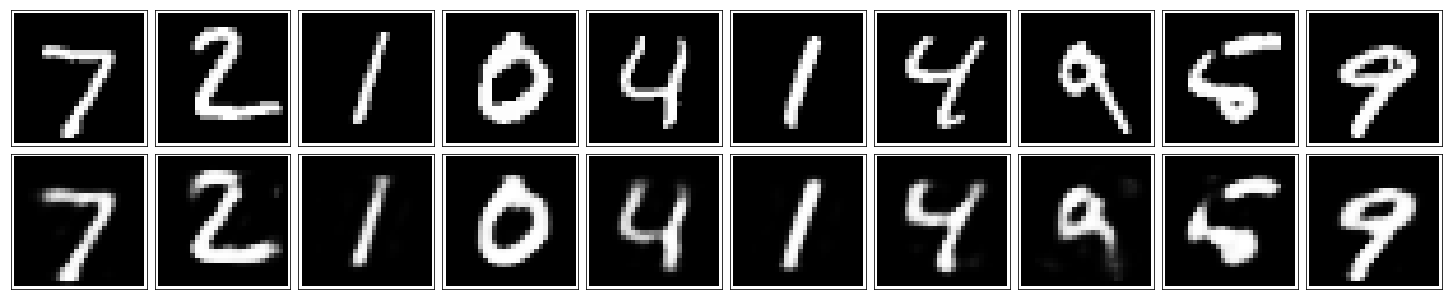

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.